In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
symptoms_data = pd.read_csv('./data/symtoms_df.csv')
training_data = pd.read_csv('./data/Training.csv')
symptoms_data = symptoms_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
training_data = training_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

C:\Users\Luthfi Hanif\AppData\Local\Temp\ipykernel_24732\163281125.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  symptoms_data = symptoms_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
C:\Users\Luthfi Hanif\AppData\Local\Temp\ipykernel_24732\163281125.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  training_data = training_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [3]:
mlb = MultiLabelBinarizer()
y_encoded = mlb.fit_transform(training_data['prognosis'].apply(lambda x: [x]))  # Wrap in list for multi-label compatibility

In [4]:
X = training_data.drop(columns=['prognosis'])
y = y_encoded

In [5]:
print(f"Unique classes: {mlb.classes_}")
print(f"Shape of target after encoding: {y.shape}")

Unique classes: ['(vertigo) paroymsal  positional vertigo' 'acne' 'aids'
 'alcoholic hepatitis' 'allergy' 'arthritis' 'bronchial asthma'
 'cervical spondylosis' 'chicken pox' 'chronic cholestasis' 'common cold'
 'dengue' 'diabetes ' 'dimorphic hemmorhoids(piles)' 'drug reaction'
 'fungal infection' 'gastroenteritis' 'gerd' 'heart attack' 'hepatitis a'
 'hepatitis b' 'hepatitis c' 'hepatitis d' 'hepatitis e' 'hypertension '
 'hyperthyroidism' 'hypoglycemia' 'hypothyroidism' 'impetigo' 'jaundice'
 'malaria' 'migraine' 'osteoarthristis' 'paralysis (brain hemorrhage)'
 'peptic ulcer diseae' 'pneumonia' 'psoriasis' 'tuberculosis' 'typhoid'
 'urinary tract infection' 'varicose veins']
Shape of target after encoding: (4920, 41)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y.shape[1], activation='sigmoid')  # Sigmoid for binary crossentropy
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

c:\Users\Luthfi Hanif\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
                    verbose=1)

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0542 - loss: 0.4344 - val_accuracy: 0.5888 - val_loss: 0.0985
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6071 - loss: 0.0906 - val_accuracy: 0.9937 - val_loss: 0.0502
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9804 - loss: 0.0438 - val_accuracy: 1.0000 - val_loss: 0.0169
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9987 - loss: 0.0173 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9987 - loss: 0.0084 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9998 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss:

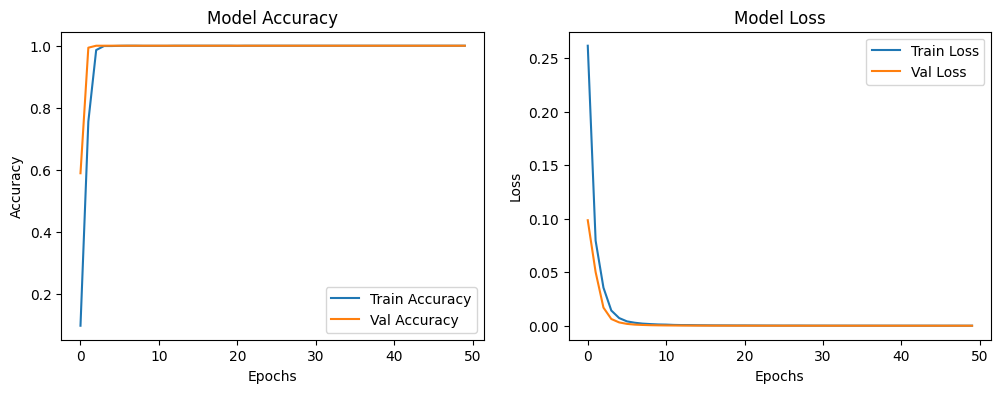

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [10]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [11]:
print(classification_report(y_test, y_pred_binary, target_names=mlb.classes_))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

                                         precision    recall  f1-score   support

(vertigo) paroymsal  positional vertigo       1.00      1.00      1.00        24
                                   acne       1.00      1.00      1.00        24
                                   aids       1.00      1.00      1.00        24
                    alcoholic hepatitis       1.00      1.00      1.00        24
                                allergy       1.00      1.00      1.00        24
                              arthritis       1.00      1.00      1.00        24
                       bronchial asthma       1.00      1.00      1.00        24
                   cervical spondylosis       1.00      1.00      1.00        24
                            chicken pox       1.00      1.00      1.00        24
                    chronic cholestasis       1.00      1.00      1.00        24
                            common cold       1.00      1.00      1.00        24
                           

In [12]:
def predict_disease(symptoms_input):
    input_data = np.zeros((1, X_train.shape[1]))
    for symptom in symptoms_input:
        if symptom in X.columns:
            input_data[0, X.columns.get_loc(symptom)] = 1
    probabilities = model.predict(input_data)[0]
    predictions = {mlb.classes_[i]: prob for i, prob in enumerate(probabilities)}
    sorted_predictions = dict(sorted(predictions.items(), key=lambda item: item[1], reverse=True))
    return sorted_predictions

# Example Prediction
user_input = ['joint_pain', 'vomiting', 'yellowish_skin', 'dark_urine']  # Replace with actual symptoms
prediction = predict_disease(user_input)
print("Predictions:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predictions: {'hepatitis d': 0.6946139, 'jaundice': 0.00051990757, 'psoriasis': 7.032578e-05, 'urinary tract infection': 5.5413784e-05, 'osteoarthristis': 3.2523156e-05, 'allergy': 1.041264e-05, 'gastroenteritis': 1.02179065e-05, 'alcoholic hepatitis': 3.8735843e-06, 'dengue': 3.66109e-06, 'hepatitis a': 3.619138e-06, 'hypothyroidism': 2.1716007e-06, 'hepatitis e': 1.0486505e-06, 'varicose veins': 9.62529e-07, 'hyperthyroidism': 8.963462e-07, 'typhoid': 7.2516804e-07, 'migraine': 2.4665482e-07, 'drug reaction': 2.4507074e-07, 'hypoglycemia': 2.1740365e-07, 'peptic ulcer diseae': 1.7192916e-07, 'hepatitis b': 1.4521734e-07, 'arthritis': 1.4491285e-07, 'paralysis (brain hemorrhage)': 1.3920723e-07, 'aids': 1.1230937e-07, 'dimorphic hemmorhoids(piles)': 9.7873176e-08, 'acne': 9.3578294e-08, 'heart attack': 8.631713e-08, 'tuberculosis': 4.4308358e-08, 'diabetes ': 2.4195252e-08, 'common cold': 2.3312284e-08, 'gerd': 2.1354273e-08, 'pneumonia': 1.189451